In [ ]:
import pandas as pd
from scipy.stats import zscore
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import glob
import os

In [2]:
data_dir = "/home/ucsd-trainXY/projects/single_cell_intestine/results/"

Previously, we only calculated the zscore for the most variable genes used to determine clusters. Let's zscore the rest of the matrix so we can look at expression of any gene in our set. 

In [3]:
all_counts = pd.read_csv(data_dir+"counts_filtered.csv", index_col=0)
print(all_counts.shape)
all_counts.head()

(5355, 1385)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B1_TTTAGAGAACGGAG_Enterocyte.Immature.Distal,B1_TTTAGAGAGGAAAT_Stem,B1_TTTAGGCTCTCTTA_Paneth,B1_TTTCACGAAGTGTC_TA.Early,B1_TTTCACGACACACA_Enterocyte.Progenitor.Early,B1_TTTCACGAGAGGCA_Stem,B1_TTTCCAGAACGCTA_Goblet,B1_TTTCCAGATGCAAC_Enterocyte.Progenitor,B1_TTTCGAACTACTGG_Stem,B1_TTTCTACTTCACCC_Enterocyte.Progenitor.Late
Mrpl15,2,1,2,2,0,4,0,1,4,0,...,0,3,1,1,0,4,2,3,0,3
Lypla1,2,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,3,0,0,3
Tcea1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,1
Atp6v1h,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rb1cc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [4]:
#Calculate TPM
all_counts_tpm = (all_counts/all_counts.sum())*10000
print(all_counts_tpm.shape)
all_counts_tpm.head()

(5355, 1385)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B1_TTTAGAGAACGGAG_Enterocyte.Immature.Distal,B1_TTTAGAGAGGAAAT_Stem,B1_TTTAGGCTCTCTTA_Paneth,B1_TTTCACGAAGTGTC_TA.Early,B1_TTTCACGACACACA_Enterocyte.Progenitor.Early,B1_TTTCACGAGAGGCA_Stem,B1_TTTCCAGAACGCTA_Goblet,B1_TTTCCAGATGCAAC_Enterocyte.Progenitor,B1_TTTCGAACTACTGG_Stem,B1_TTTCTACTTCACCC_Enterocyte.Progenitor.Late
Mrpl15,3.401939,3.668379,2.660636,2.478008,0.0,4.950495,0.0,2.054232,3.161555,0.0,...,0.0,3.075661,1.357958,1.646633,0.0,17.621145,2.925688,3.489184,0.000000,10.334137
Lypla1,3.401939,0.000000,0.000000,1.239004,0.0,0.000000,0.0,0.000000,0.790389,0.0,...,0.0,1.025220,0.000000,1.646633,0.0,0.000000,4.388531,0.000000,0.000000,10.334137
Tcea1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,1.025220,0.000000,0.000000,0.0,0.000000,0.000000,2.326122,0.000000,3.444712
Atp6v1h,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Rb1cc1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,12.004802,0.000000


In [5]:
#z-score normalize
all_counts_zscore = pd.DataFrame(zscore(np.log2(all_counts_tpm), axis=1), index = all_counts_tpm.index)
all_counts_zscore.columns = all_counts_tpm.columns
print(all_counts_zscore.shape)
all_counts_zscore.head()

(5355, 1385)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B1_TTTAGAGAACGGAG_Enterocyte.Immature.Distal,B1_TTTAGAGAGGAAAT_Stem,B1_TTTAGGCTCTCTTA_Paneth,B1_TTTCACGAAGTGTC_TA.Early,B1_TTTCACGACACACA_Enterocyte.Progenitor.Early,B1_TTTCACGAGAGGCA_Stem,B1_TTTCCAGAACGCTA_Goblet,B1_TTTCCAGATGCAAC_Enterocyte.Progenitor,B1_TTTCGAACTACTGG_Stem,B1_TTTCTACTTCACCC_Enterocyte.Progenitor.Late
Mrpl15,0.183166,0.260672,-0.032475,-0.085601,-0.806441,0.633634,-0.806441,-0.208875,0.113240,-0.806441,...,-0.806441,0.088254,-0.411418,-0.327444,-0.806441,4.319462,0.044627,0.208545,-0.806441,2.199708
Lypla1,0.963794,-0.448155,-0.448155,0.066084,-0.448155,-0.448155,-0.448155,-0.448155,-0.120111,-0.448155,...,-0.448155,-0.022645,-0.448155,0.235267,-0.448155,-0.448155,1.373271,-0.448155,-0.448155,3.840950
Tcea1,-0.345117,-0.345117,-0.345117,-0.345117,-0.345117,-0.345117,-0.345117,-0.345117,-0.345117,-0.345117,...,-0.345117,0.803392,-0.345117,-0.345117,-0.345117,-0.345117,-0.345117,2.260734,-0.345117,3.513841
Atp6v1h,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,...,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648
Rb1cc1,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,...,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,12.282849,-0.264512


In [6]:
#save result
all_counts_zscore.to_csv(data_dir+"all_counts_zscore.csv")

**Make summary plots using the top 5 markers for each cluster**

In [7]:
#glob functions let us grab lots of file names at a time using the star wildcard character

res_files = glob.glob(data_dir+"*_markers.csv")
res_files

['/home/ucsd-train02/projects/single_cell_intestine/results/cluster4_markers.csv',
 '/home/ucsd-train02/projects/single_cell_intestine/results/cluster6_markers.csv',
 '/home/ucsd-train02/projects/single_cell_intestine/results/cluster0_markers.csv',
 '/home/ucsd-train02/projects/single_cell_intestine/results/cluster2_markers.csv',
 '/home/ucsd-train02/projects/single_cell_intestine/results/cluster1_markers.csv',
 '/home/ucsd-train02/projects/single_cell_intestine/results/cluster3_markers.csv',
 '/home/ucsd-train02/projects/single_cell_intestine/results/cluster5_markers.csv',
 '/home/ucsd-train02/projects/single_cell_intestine/results/cluster7_markers.csv']

We are going to write a for loop to load in each dataframe and grab the top 5 marker genes for each cluster.

In [8]:
genes_by_cluster = dict()

for cluster in res_files:
    df = pd.read_csv(cluster, index_col=0)
    df.sort_values('avg_logFC', ascending=False, inplace=True)
    cluster_number = os.path.basename(cluster).split("_")[0]
    genes = list(df.index[:5])
    genes_by_cluster[cluster_number] = genes

In [9]:
df.sort_values('avg_logFC', ascending=False).head()

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Adh1,4.190140e-28,2.565080,0.935,0.247,2.243820e-24
Cd24a,8.405633e-20,2.434132,0.968,0.558,4.501217e-16
Reep5,1.813103e-41,2.314869,0.871,0.117,9.709168e-38
Snrnp25,5.858088e-27,2.169748,0.935,0.250,3.137006e-23
Tm4sf4,1.138247e-30,2.145862,0.839,0.145,6.095313e-27


In [10]:
genes_by_cluster

{'cluster0': ['Dmbt1', 'Rbp7', '2810417H13Rik', 'Hmgb2', 'Myo15b'],
 'cluster1': ['Ifitm3', 'Gkn3', 'Slc12a2', 'Amica1', 'Igfbp4'],
 'cluster2': ['St3gal4', 'Slc51a', 'Car4', 'Gsdmc4', 'Apol10a'],
 'cluster3': ['Ube2c', 'Top2a', 'Kif22', 'Mki67', 'H2afx'],
 'cluster4': ['Agr2', 'Spink4', 'Fcgbp', 'Ccl6', 'Muc2'],
 'cluster5': ['Apoa4', 'Apoa1', 'Apoc3', 'Apoc2', 'Rbp2'],
 'cluster6': ['Chgb', 'Sct', 'Chga', 'Fabp5', 'Tm4sf4'],
 'cluster7': ['Adh1', 'Cd24a', 'Reep5', 'Snrnp25', 'Tm4sf4']}

In [11]:
genes_by_cluster.values()

dict_values([['Agr2', 'Spink4', 'Fcgbp', 'Ccl6', 'Muc2'], ['Chgb', 'Sct', 'Chga', 'Fabp5', 'Tm4sf4'], ['Dmbt1', 'Rbp7', '2810417H13Rik', 'Hmgb2', 'Myo15b'], ['St3gal4', 'Slc51a', 'Car4', 'Gsdmc4', 'Apol10a'], ['Ifitm3', 'Gkn3', 'Slc12a2', 'Amica1', 'Igfbp4'], ['Ube2c', 'Top2a', 'Kif22', 'Mki67', 'H2afx'], ['Apoa4', 'Apoa1', 'Apoc3', 'Apoc2', 'Rbp2'], ['Adh1', 'Cd24a', 'Reep5', 'Snrnp25', 'Tm4sf4']])

Load in cluster assignment from phenograph output

In [12]:
cell_assignments = pd.read_csv(data_dir+"cells_phenograph_k30_assignment.csv", index_col=0)
print(cell_assignments.shape)
cell_assignments.head()

(1385, 1)


,community
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,5
B1_AAACCGTGCCAAGT_Tuft,0
B1_AAACGCACAGCCTA_Goblet,3
B1_AAACGCACCAGATC_Endocrine,1
B1_AAACGCACCGCCTT_Stem,0


/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


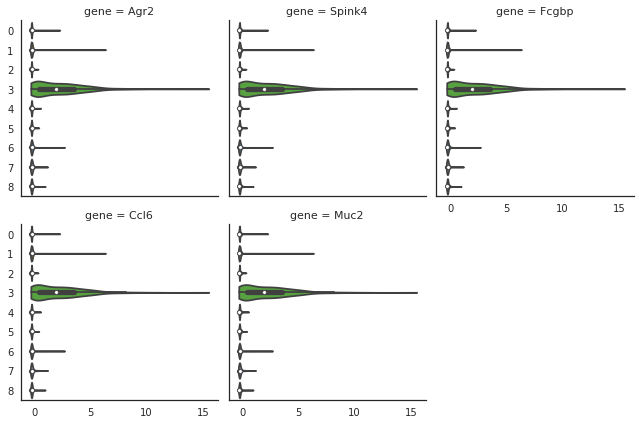

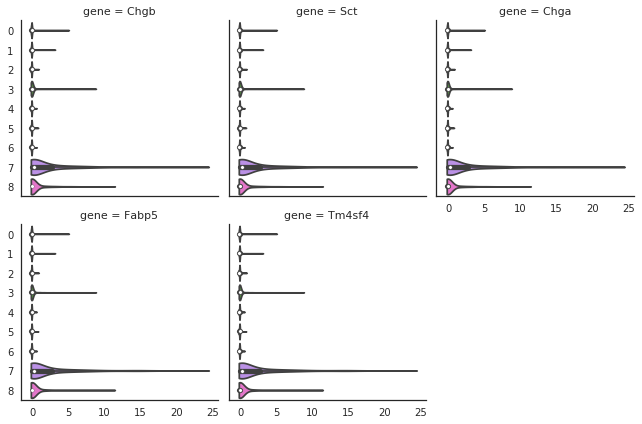

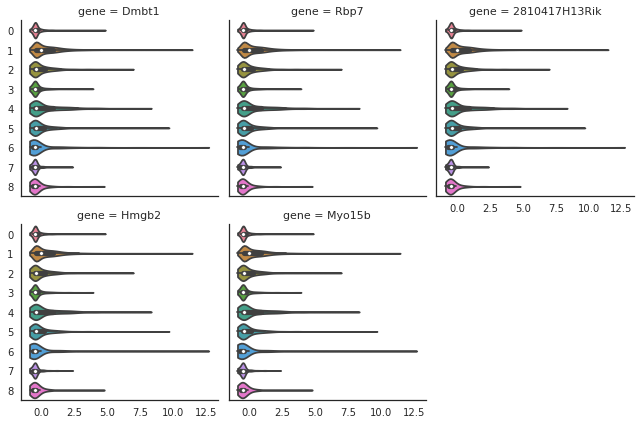

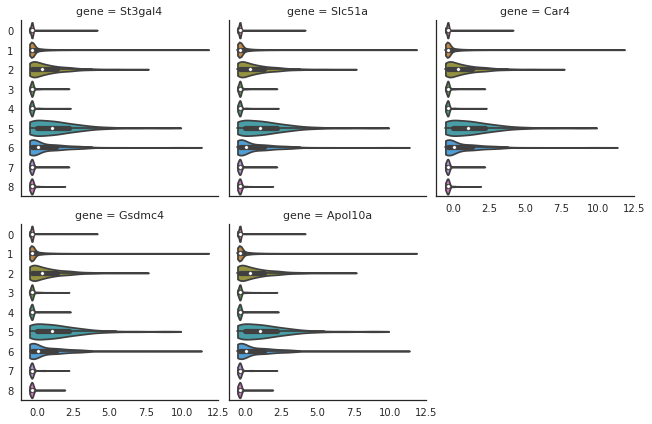

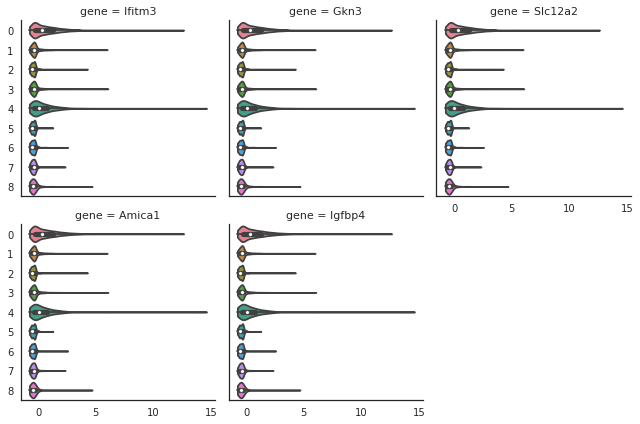

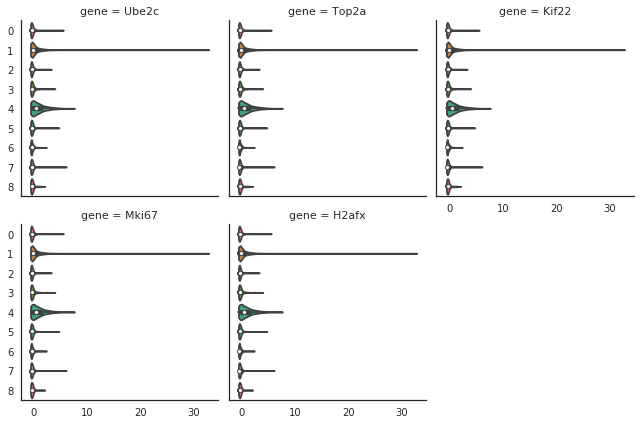

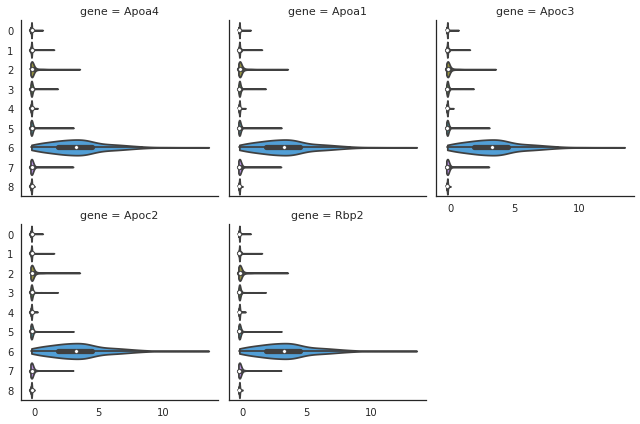

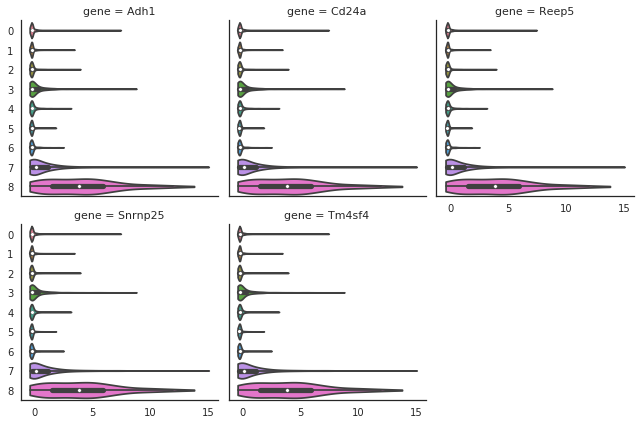

In [14]:
sns.set_style("white")
for cluster in genes_by_cluster.keys():
    genes_of_interest = genes_by_cluster[cluster]
    subset=all_counts_zscore.loc[genes_of_interest].T
    subset = subset.join(cell_assignments)
    tidy = pd.melt(subset, id_vars='community', value_vars = genes_of_interest,
                  value_name = 'z_score_expression', var_name = 'gene')
    g = sns.FacetGrid(tidy, col='gene', col_wrap=3)
    g.map(sns.violinplot, x='z_score_expression', y='community', data=tidy,  
      cut=0, scale='width', orient='h', palette='husl')
#     g.map(sns.stripplot, x='z_score_expression', y='community', data=tidy,  
#       palette='husl', jitter=True)

    plt.show()

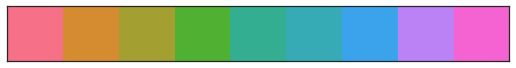

In [15]:
colors = sns.color_palette(palette="husl", n_colors=9)
sns.palplot(colors)

In [31]:
print(all_counts_zscore.shape)
all_counts_zscore.head()

(5355, 1385)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B1_TTTAGAGAACGGAG_Enterocyte.Immature.Distal,B1_TTTAGAGAGGAAAT_Stem,B1_TTTAGGCTCTCTTA_Paneth,B1_TTTCACGAAGTGTC_TA.Early,B1_TTTCACGACACACA_Enterocyte.Progenitor.Early,B1_TTTCACGAGAGGCA_Stem,B1_TTTCCAGAACGCTA_Goblet,B1_TTTCCAGATGCAAC_Enterocyte.Progenitor,B1_TTTCGAACTACTGG_Stem,B1_TTTCTACTTCACCC_Enterocyte.Progenitor.Late
Mrpl15,0.183166,0.260672,-0.032475,-0.085601,-0.806441,0.633634,-0.806441,-0.208875,0.113240,-0.806441,...,-0.806441,0.088254,-0.411418,-0.327444,-0.806441,4.319462,0.044627,0.208545,-0.806441,2.199708
Lypla1,0.963794,-0.448155,-0.448155,0.066084,-0.448155,-0.448155,-0.448155,-0.448155,-0.120111,-0.448155,...,-0.448155,-0.022645,-0.448155,0.235267,-0.448155,-0.448155,1.373271,-0.448155,-0.448155,3.840950
Tcea1,-0.345117,-0.345117,-0.345117,-0.345117,-0.345117,-0.345117,-0.345117,-0.345117,-0.345117,-0.345117,...,-0.345117,0.803392,-0.345117,-0.345117,-0.345117,-0.345117,-0.345117,2.260734,-0.345117,3.513841
Atp6v1h,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,...,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648,-0.306648
Rb1cc1,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,...,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,-0.264512,12.282849,-0.264512


In [32]:
cells_sorted = all_counts_zscore.T.join(cell_assignments['community']).sort_values(by='community')
print(cells_sorted.shape)
cells_sorted.head()

(1385, 5356)


,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,Rrs1,Snhg6,Cops5,Arfgef1,Tram1,...,Zdhhc6,Tcf7l2,Casp7,Trub1,Shtn1,Fam204a,Eif3a,Prdx3,Zfp950,community
B1_CCGACTACGCTTAG_Stem,-0.806441,-0.448155,-0.345117,-0.306648,-0.264512,-0.397937,-0.403371,-0.631402,-0.355584,-0.476829,...,2.068554,-0.31564,-0.447712,2.336272,-0.241611,-0.343313,-0.703093,-0.734067,-0.274004,0
B1_CCTATTGACTTGGA_Stem,-0.374204,-0.448155,-0.345117,-0.306648,-0.264512,0.689461,0.570118,1.795627,-0.355584,-0.476829,...,-0.396657,-0.31564,0.297566,-0.222037,-0.241611,0.991132,-0.703093,1.628034,-0.274004,0
B1_CCTCATCTCGTTGA_Stem,0.235260,-0.448155,-0.345117,-0.306648,-0.264512,-0.397937,-0.403371,-0.631402,-0.355584,-0.476829,...,-0.396657,-0.31564,-0.447712,-0.222037,1.447798,-0.343313,0.784869,-0.734067,-0.274004,0
B1_CGAAGACTTCTACT_Stem,0.266973,-0.448155,1.721775,-0.306648,3.592297,-0.397937,-0.403371,-0.631402,-0.355584,-0.476829,...,-0.396657,-0.31564,0.477697,-0.222037,-0.241611,1.313665,0.830166,-0.000813,-0.274004,0
B1_CGACAAACAAACGA_Stem,-0.806441,-0.448155,3.834941,-0.306648,-0.264512,-0.397937,-0.403371,-0.631402,-0.355584,-0.476829,...,-0.396657,-0.31564,1.423824,-0.222037,-0.241611,-0.343313,0.847330,2.231779,-0.274004,0


In [33]:
communities = set(cells_sorted['community'])
color_dict = dict(zip(communities, colors))

In [34]:
color_list = []
for i in cells_sorted['community']:
    to_append = color_dict[i]
    color_list.append(to_append)
    

In [35]:
cells_sorted.head()

,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,Rrs1,Snhg6,Cops5,Arfgef1,Tram1,...,Zdhhc6,Tcf7l2,Casp7,Trub1,Shtn1,Fam204a,Eif3a,Prdx3,Zfp950,community
B1_CCGACTACGCTTAG_Stem,-0.806441,-0.448155,-0.345117,-0.306648,-0.264512,-0.397937,-0.403371,-0.631402,-0.355584,-0.476829,...,2.068554,-0.31564,-0.447712,2.336272,-0.241611,-0.343313,-0.703093,-0.734067,-0.274004,0
B1_CCTATTGACTTGGA_Stem,-0.374204,-0.448155,-0.345117,-0.306648,-0.264512,0.689461,0.570118,1.795627,-0.355584,-0.476829,...,-0.396657,-0.31564,0.297566,-0.222037,-0.241611,0.991132,-0.703093,1.628034,-0.274004,0
B1_CCTCATCTCGTTGA_Stem,0.235260,-0.448155,-0.345117,-0.306648,-0.264512,-0.397937,-0.403371,-0.631402,-0.355584,-0.476829,...,-0.396657,-0.31564,-0.447712,-0.222037,1.447798,-0.343313,0.784869,-0.734067,-0.274004,0
B1_CGAAGACTTCTACT_Stem,0.266973,-0.448155,1.721775,-0.306648,3.592297,-0.397937,-0.403371,-0.631402,-0.355584,-0.476829,...,-0.396657,-0.31564,0.477697,-0.222037,-0.241611,1.313665,0.830166,-0.000813,-0.274004,0
B1_CGACAAACAAACGA_Stem,-0.806441,-0.448155,3.834941,-0.306648,-0.264512,-0.397937,-0.403371,-0.631402,-0.355584,-0.476829,...,-0.396657,-0.31564,1.423824,-0.222037,-0.241611,-0.343313,0.847330,2.231779,-0.274004,0


In [39]:
import itertools
genes_of_interest = list(itertools.chain.from_iterable(genes_by_cluster.values()))
print(len(genes_of_interest))

40


/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


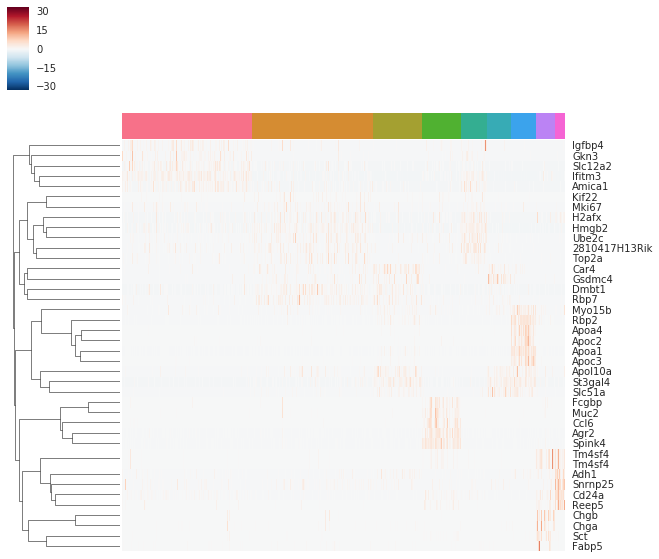

In [41]:
subset = cells_sorted[genes_of_interest]

g = sns.clustermap(subset.T, xticklabels='', col_colors = color_list, col_cluster=False)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()